# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

##  Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# your code go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Generate random data for the social media data

Now that I have the required imports, I need to generate some random tweet data to analyze. in this case,  I use pandas date range to choose a pseudo-random date within range, the random module's choice to create a choice from list, and numpy's random to create a random integer

In [2]:
# A list of cateories for the social media 
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [3]:
# Data dictionary with fields Date, Category, and number of likes, all with random data
data = {'Date': pd.date_range('2021-01-01', periods=500),
        'Category': [random.choice(categories) for i in range(500)], 
        'Likes': np.random.randint(0, 10000, size=500)}

## Load the data into a pandas DataFrame and Explore the data

The next step is to load the randomly generated data into the pandas dataframe and print the data. To do so, I need to use the DataFrame method of the pandas object and pass the data to it. Then, print the dataframe head, the dataframe information , and the dataframe description. Finally, Print the count of each Category element.

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Date,Category,Likes
0,2021-01-01,Travel,5846
1,2021-01-02,Fashion,4101
2,2021-01-03,Music,1641
3,2021-01-04,Travel,9689
4,2021-01-05,Fitness,1686


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [7]:
df.describe()

,Likes
count,500.000000
mean,5128.592000
std,2884.749978
min,40.000000
25%,2667.750000
50%,5205.000000
75%,7592.000000
max,9990.000000


### Value Counts

Value_counts is a good way of understanding how many units of each characteristics we have

In [8]:
df['Category'].value_counts()

Travel     72
Music      67
Fitness    66
Food       66
Health     66
Fashion    61
Family     56
Culture    46
Name: Category, dtype: int64

## Clean the data

An important aspect of processing data is to remove invalid data points so I can effectively perform statistics and visualize the data. First, remove all the null and duplicate data. To appropriately display the data field, convert the dataframe field to a datetime format using pandas object.

### Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 500 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate values from the dataset. For example prior to removing i had 500 rows of data but after removing the duplicate 

In [9]:
df.shape

(500, 3)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 3)


In [11]:
# Used to count the number of rows
df.count()

Date        500
Category    500
Likes       500
dtype: int64

In [12]:
df = df.drop_duplicates()
df.head(5)

,Date,Category,Likes
0,2021-01-01,Travel,5846
1,2021-01-02,Fashion,4101
2,2021-01-03,Music,1641
3,2021-01-04,Travel,9689
4,2021-01-05,Fitness,1686


### Dropping the missing or null values

This is mostly similiar to the previous step but in here all the missing values are detected are droped later. Now, this is not a good appraoch to do so, because many people just replace the missing values with the mean or average coumn, but in this case, I just dropped the missing values.

In [13]:
print(df.isnull().sum())

Date        0
Category    0
Likes       0
dtype: int64


In [14]:
# dropiing missing vlalues
df = df.dropna()
df.count()

Date        500
Category    500
Likes       500
dtype: int64

In [15]:
# convert the dataframe field to datetime format using the pandas object
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.head()

,Date,Category,Likes
0,2021-01-01,Travel,5846
1,2021-01-02,Fashion,4101
2,2021-01-03,Music,1641
3,2021-01-04,Travel,9689
4,2021-01-05,Fitness,1686


## Visualize and Analyze the data

An important aspect of data analysis is the ability to physically view it to visually observe relationships amomg the data using charts and graphs. The second way to analyze the data is to perform statistics on it. for example compute the average.

### Histograms<a id="8"></a>

A histogram is a way of representing the _frequency_ distribution of numeric dataset. The way it works is it partitions the x-axis into _bins_, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


In [17]:
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

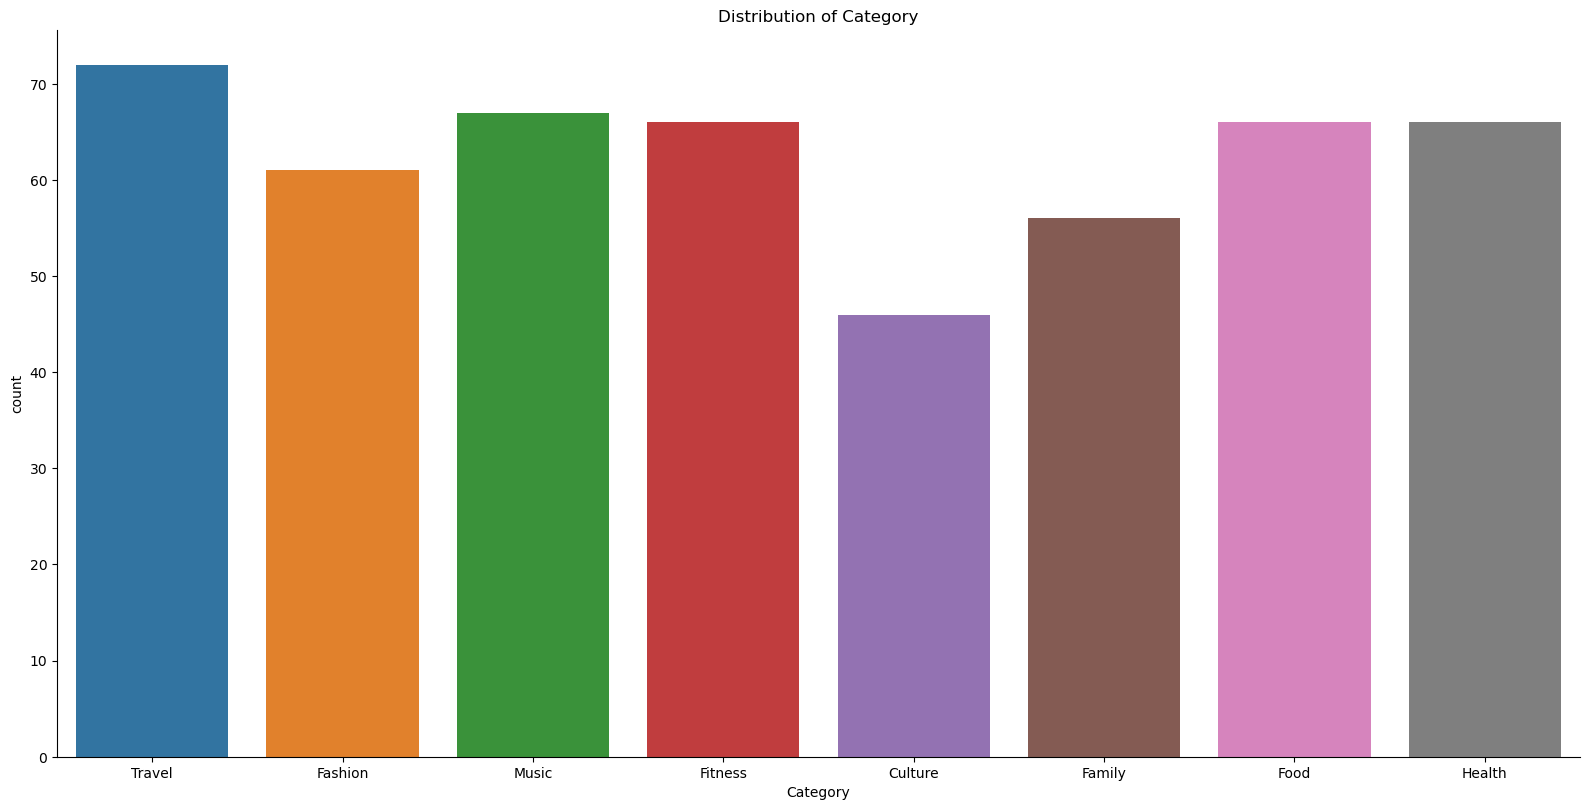

In [18]:
plot_categorical_distribution(df, 'Category')

In [19]:
df['Likes'].mean()

5128.592

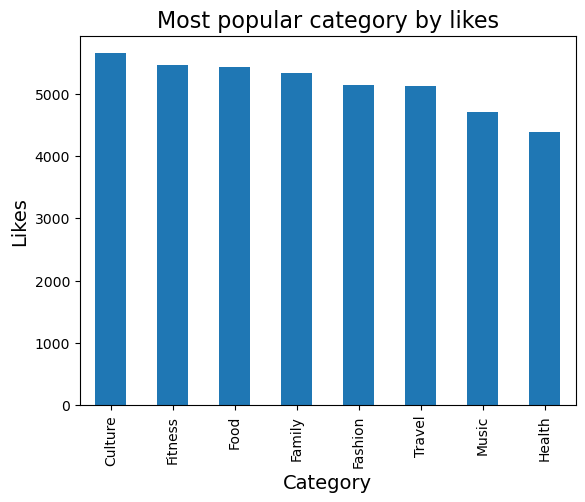

In [30]:
aveg_likes= df.groupby('Category')['Likes'].mean().nlargest(8)
aveg_likes.plot(kind = 'bar')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Likes', fontsize=14)
plt.title('Most popular category by likes', fontsize=16)
plt.show()

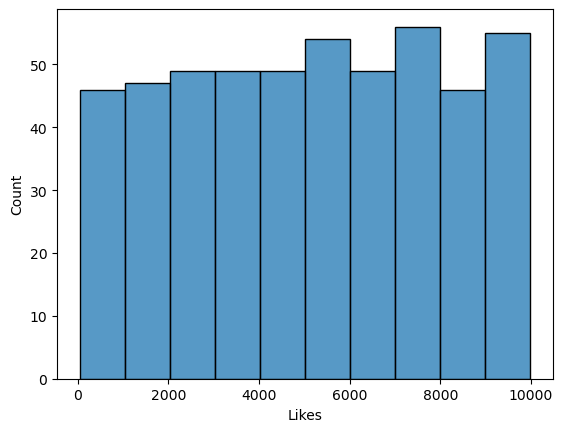

In [26]:
sns.histplot(df['Likes'])
plt.show()

###  Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the _distribution_ of the data through five main dimensions: 

-   **Minimun:** Smallest number in the dataset.
-   **First quartile:** Middle number between the `minimum` and the `median`.
-   **Second quartile (Median):** Middle number of the (sorted) dataset.
-   **Third quartile:** Middle number between `median` and `maximum`.
-   **Maximum:** Highest number in the dataset.


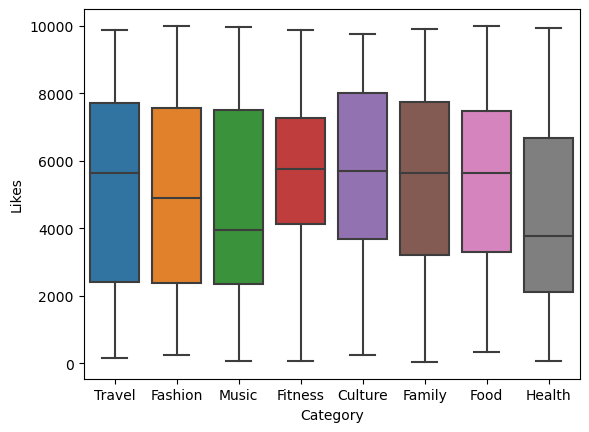

In [24]:
sns.boxplot(x = 'Category', y = 'Likes', data = df)
plt.show()

In [25]:
category_likes = df.groupby('Category')['Likes'].mean()
print(category_likes)

Category
Culture    5647.978261
Family     5329.500000
Fashion    5136.426230
Fitness    5462.363636
Food       5433.575758
Health     4387.727273
Music      4708.776119
Travel     5118.125000
Name: Likes, dtype: float64


## Conclusion

I found the following insights as part of the analysis:
- The most popular categories of user engagement are culture and fitness
- The highest frequency distribution of  categories are travel while the lowest is culture
- The average values of culture is 5647.9782 and travel is 5118.1250
- The overall engagement of the platform is encouraging